# TP final de IAA

## Info Reelevante:
https://archive.ics.uci.edu/dataset/1/abalone
https://es.wikipedia.org/wiki/Haliotis


## Traer el dataset (una de dos formas)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# esto a veces falla, si no funciona, se cargan los archivos locales...
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


In [60]:
# Cargar archivos locales

column_names = [
    "Sex", "Length", "Diameter", "Height", "Whole weight",
    "Shucked weight", "Viscera weight", "Shell weight", "Rings"
    ]


data = pd.read_csv("abalone.data", names=column_names)

atributos = [
    "Sex", "Length", "Diameter", "Height", "Whole weight",
    "Shucked weight", "Viscera weight", "Shell weight"
    ]


X = data[atributos]
y = data["Rings"] 



In [ ]:
# Clasificando los targets en categorias.
bins = [0, 8, 10, 29]
labels = ['clase0', 'clase1', 'clase2']
y = pd.cut(y, bins=bins, labels=labels)

In [ ]:
# Separo en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)

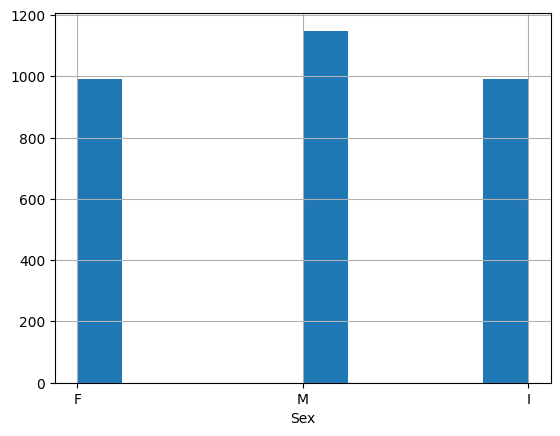

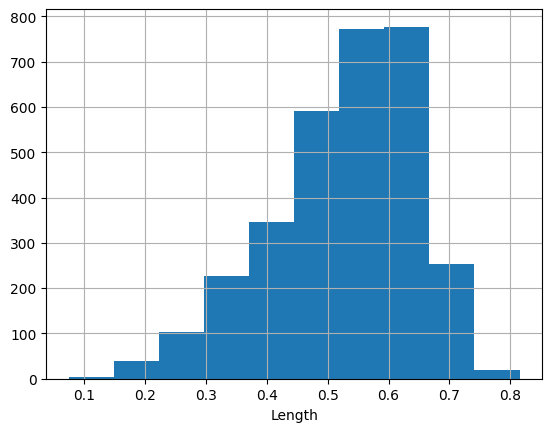

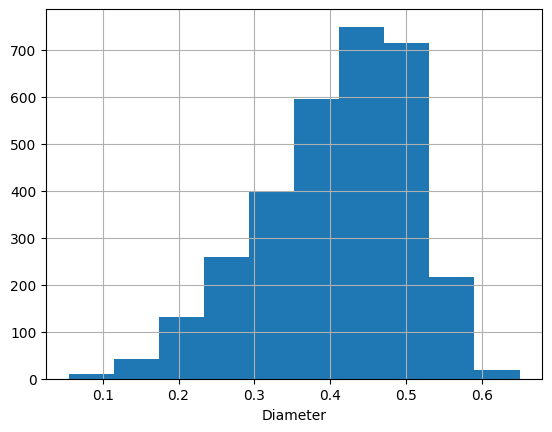

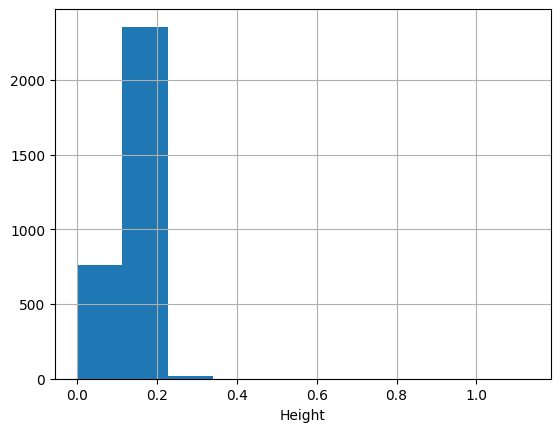

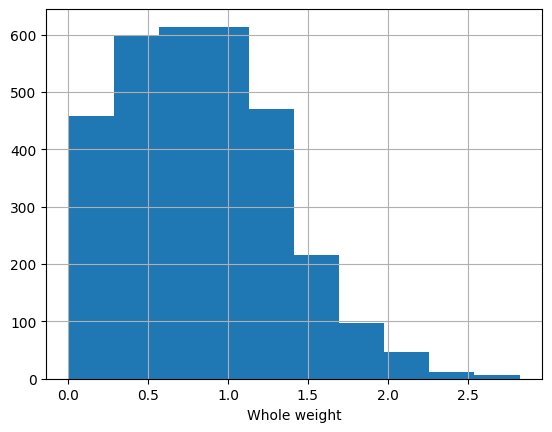

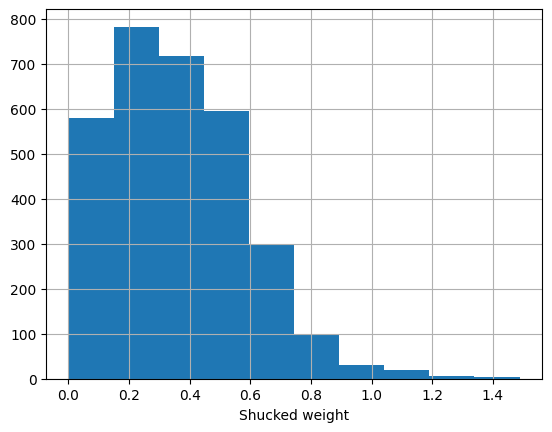

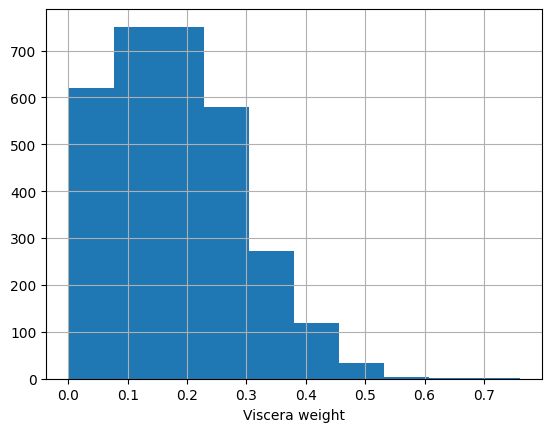

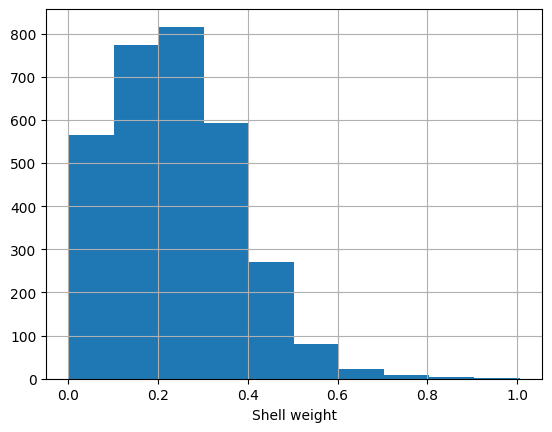

In [61]:
# y.describe()

# plt.scatter(X,y, s=2, label='Datos Medidos')
for atributo in atributos:
    X_train[atributo].hist()
    plt.xlabel(atributo)
    plt.show()

In [62]:
# hay un par de outliers que hacen que el histograma de feo ppara Heigth
# X_train[X_train["Height"] < 0.5].Height.hist()

X_train[X_train["Height"] > 0.5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335


In [63]:
# Sacamos los 2 outliers.
outliers_heigth = [1417, 2051]

X_train = X_train[X_train["Height"] < 0.5]
y_train = y_train.drop(outliers_heigth, inplace=False)

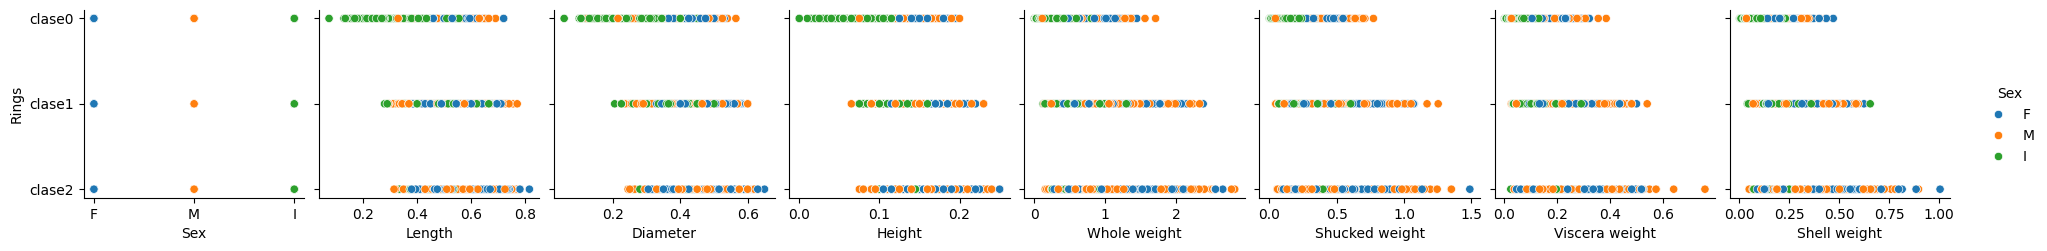

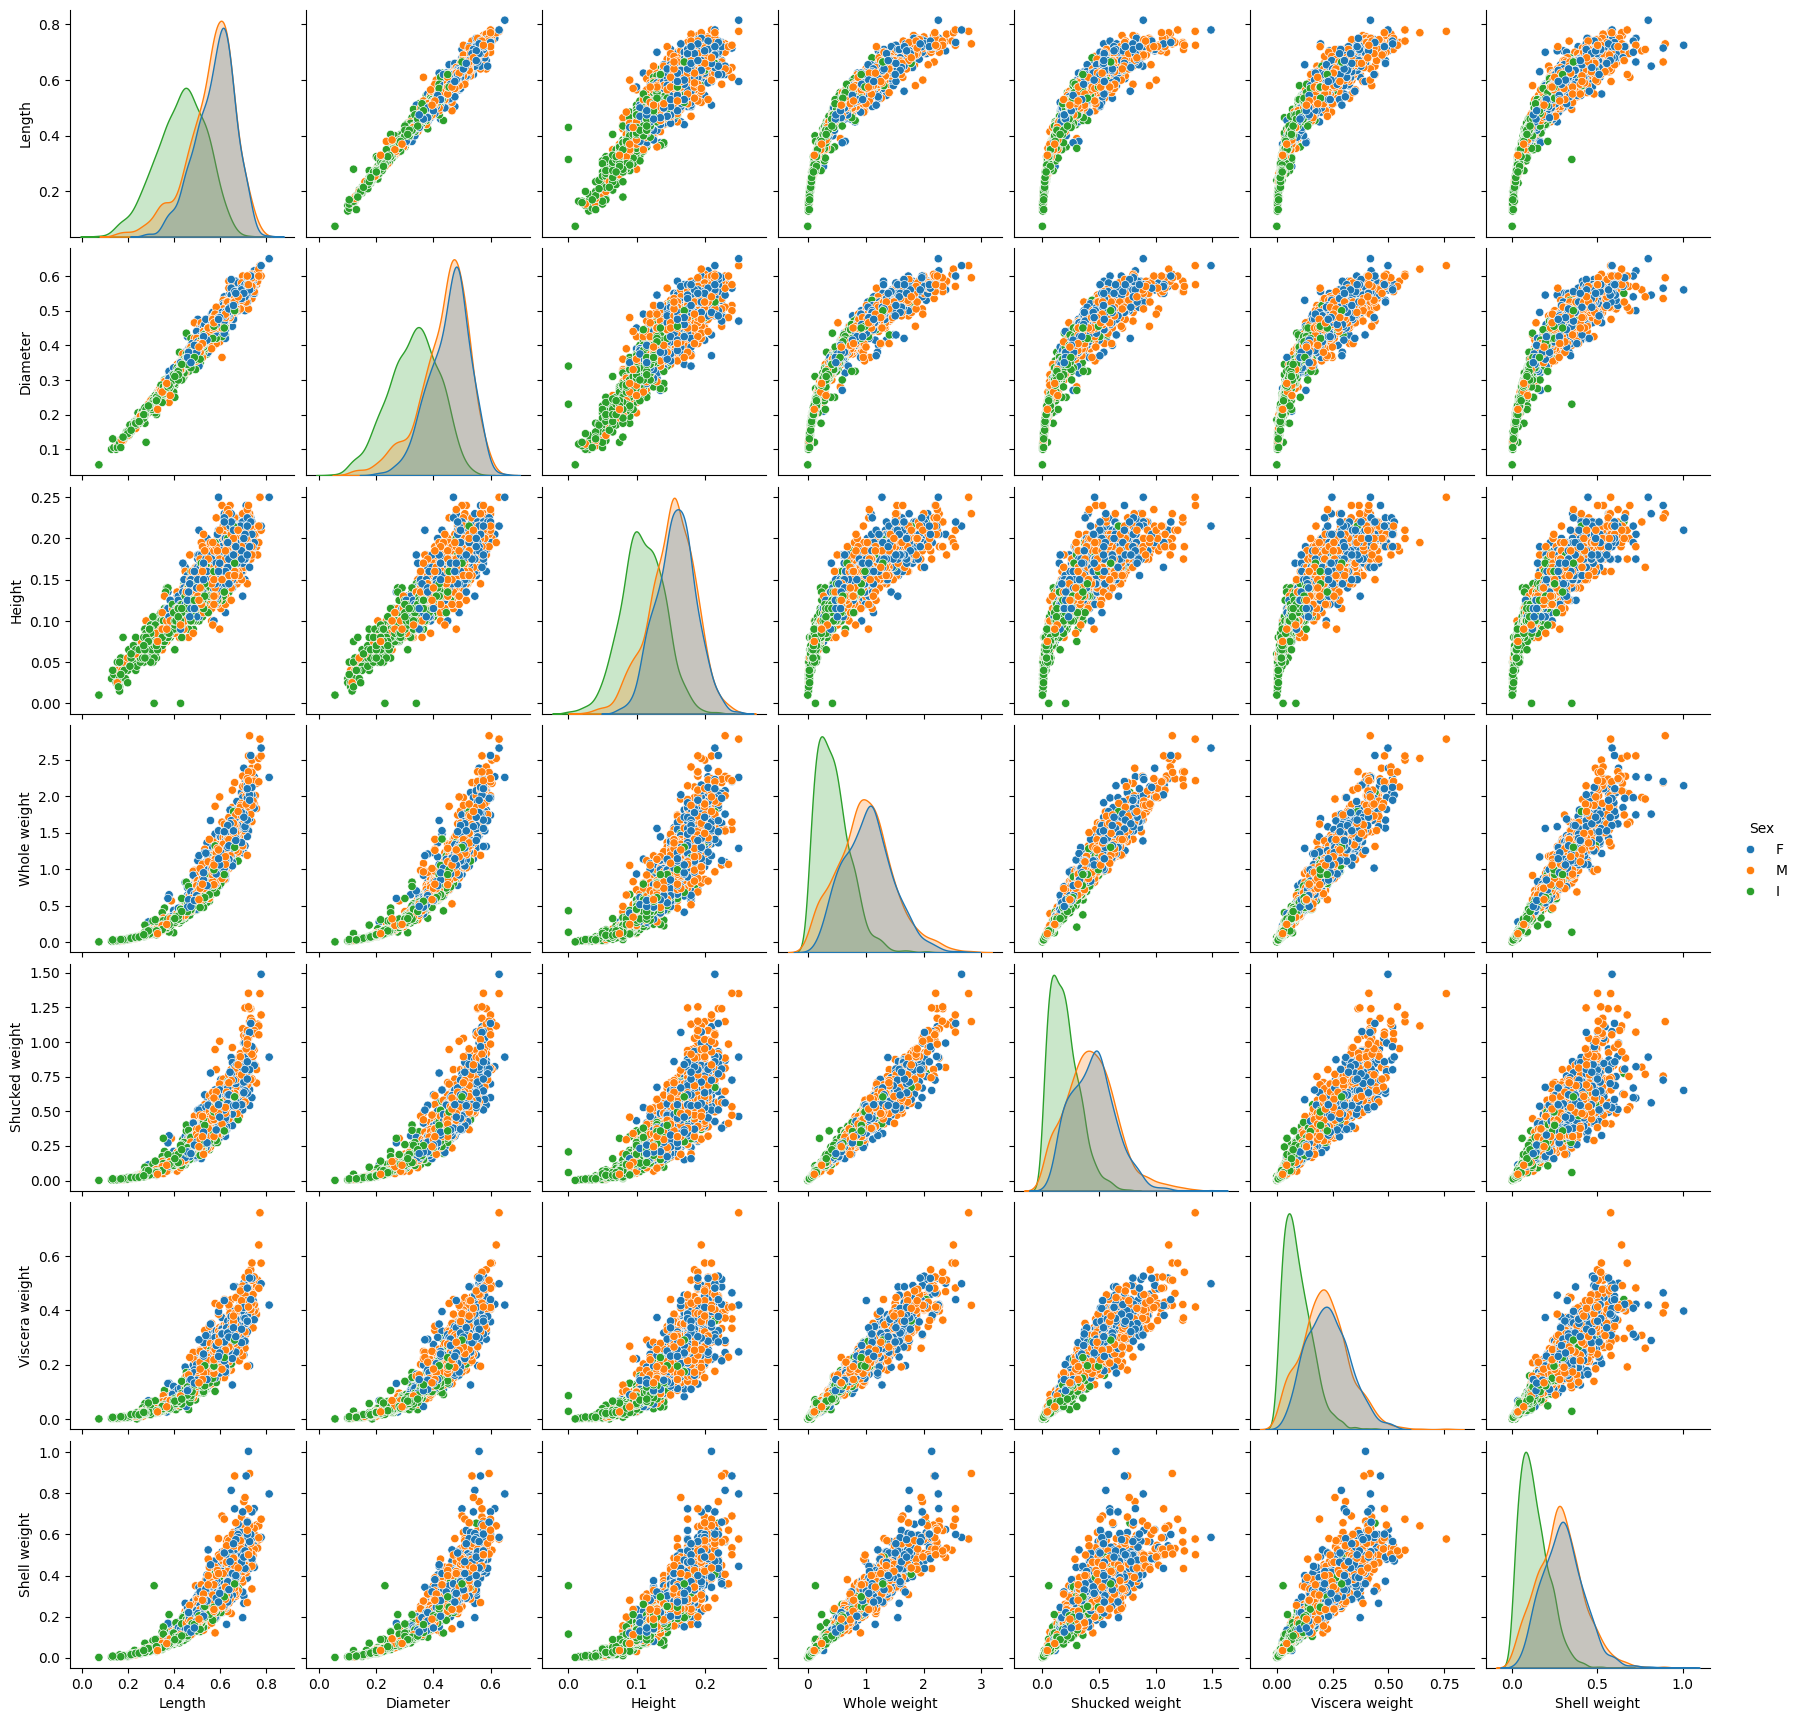

In [76]:
import seaborn as sns

train = pd.merge(X_train, y_train, left_index=True, right_index=True)

sns.pairplot(train, y_vars='Rings', x_vars=train.columns[:-1], hue="Sex")  # Excluir 'Rings' de las variables X

sns.pairplot(train, hue="Sex")

In [89]:
train.groupby(["Rings", "Sex"]).Sex.count()

# train.columns

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2504\1401314598.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(["Rings", "Sex"]).Sex.count()


Rings   Sex
clase0  F      141
        I      675
        M      234
clase1  F      365
        I      195
        M      419
clase2  F      484
        I      122
        M      495
Name: Sex, dtype: int64

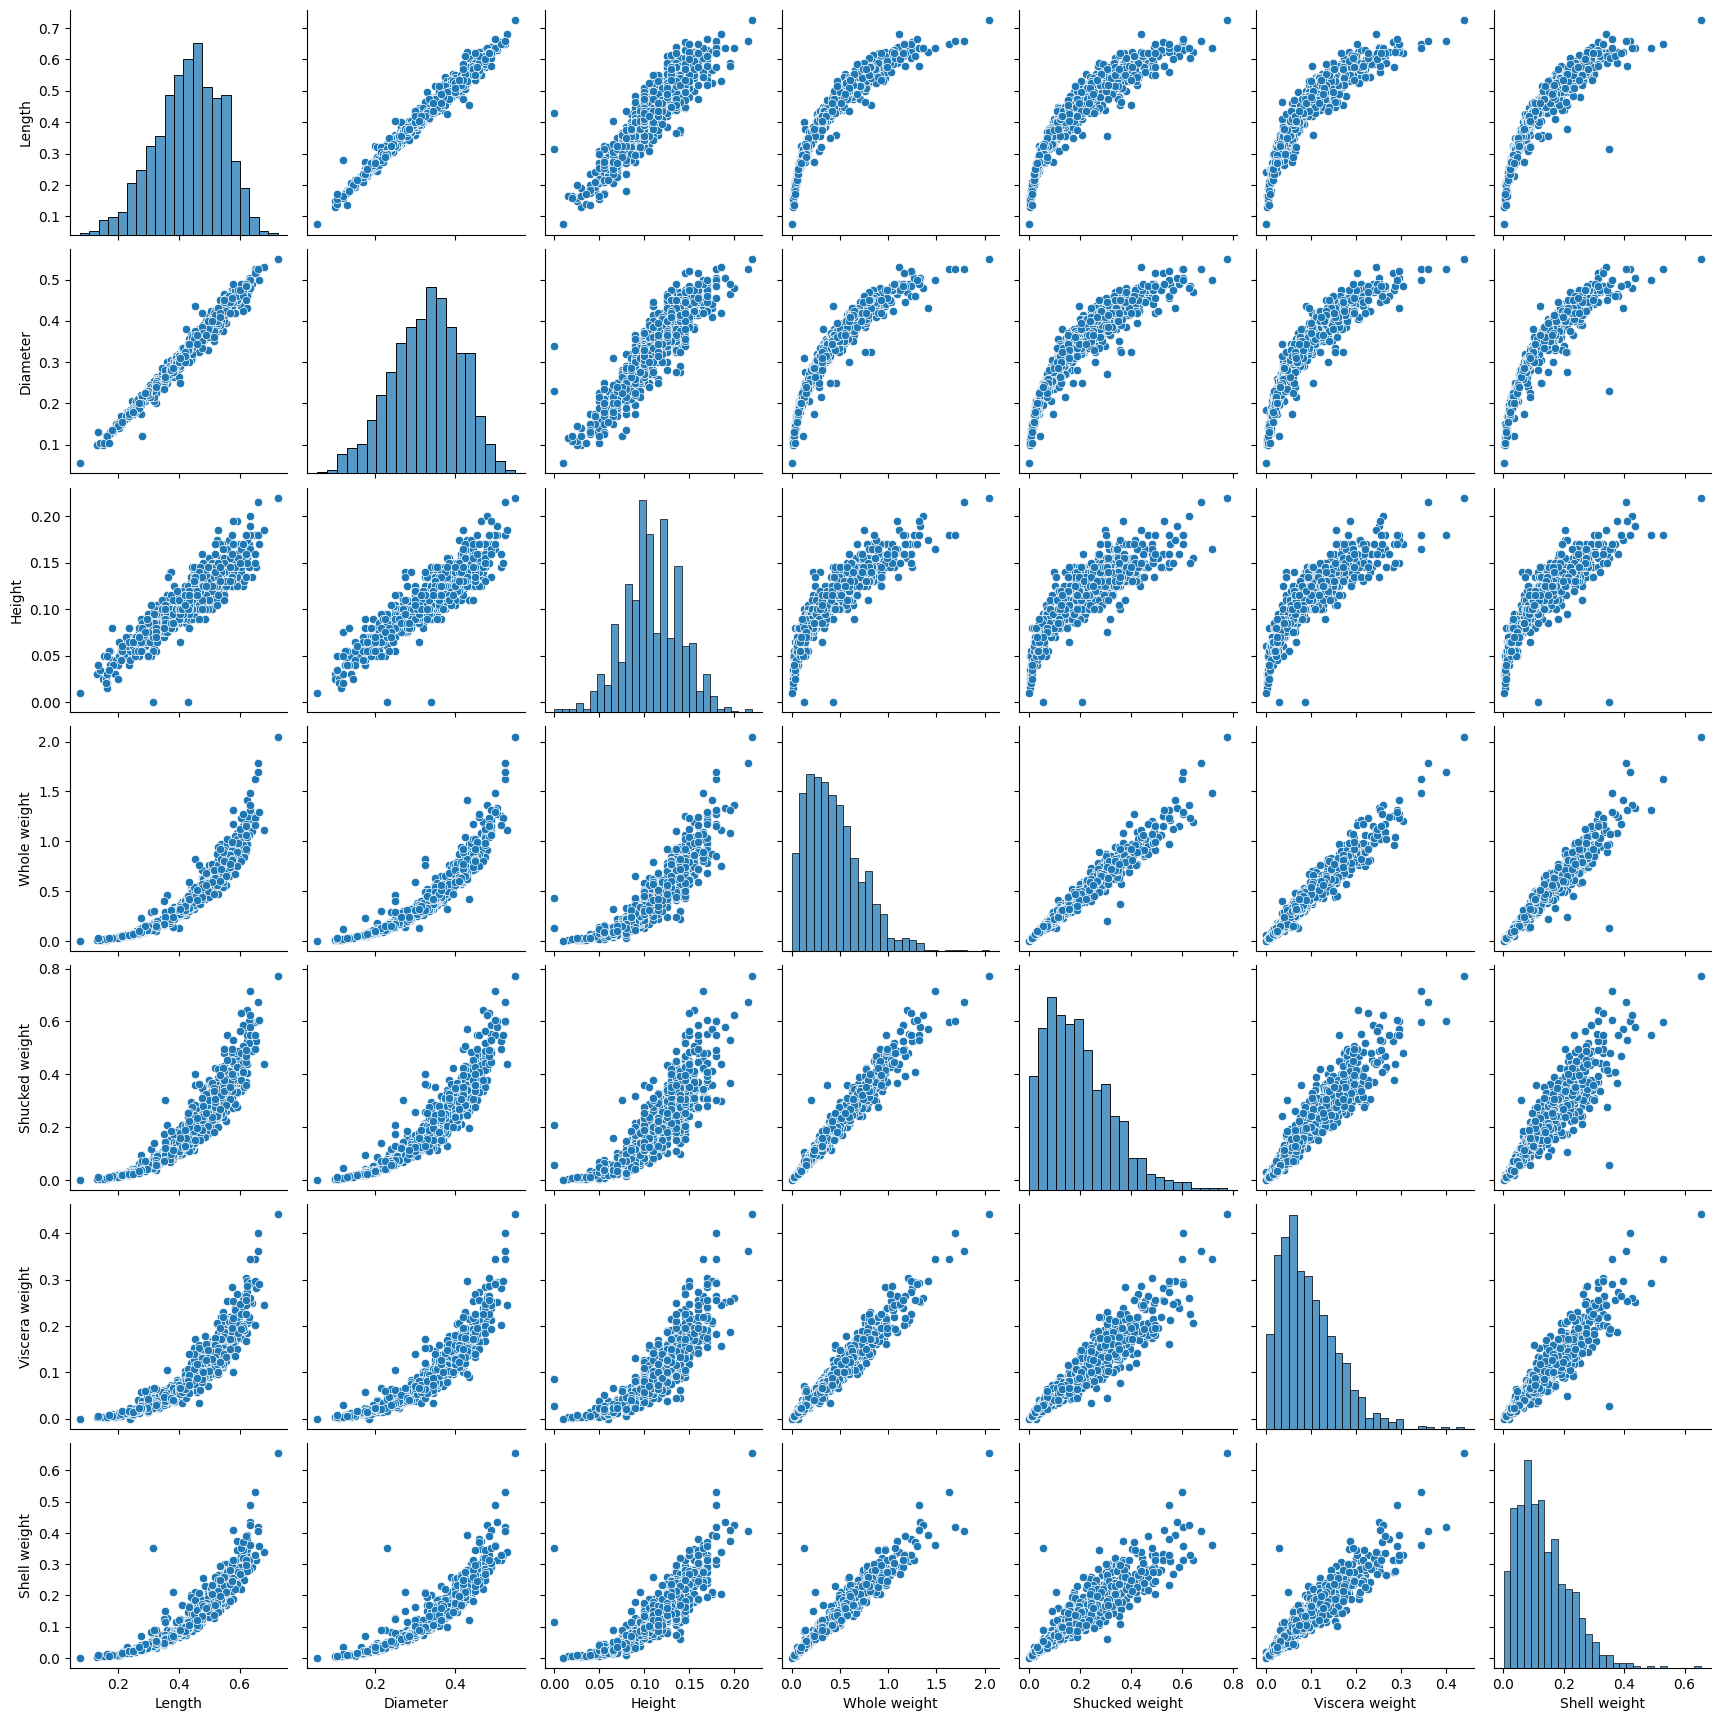

In [65]:
infant_train = train[train["Sex"]=="I"]

sns.pairplot(infant_train)

Vamos a probar armar un modelo para ver que pasa...

[Text(0.45601851851851855, 0.9285714285714286, 'x[6] <= 0.155\ngini = 0.666\nsamples = 3130\nvalue = [1050, 979, 1101]'),
 Text(0.19791666666666666, 0.7857142857142857, 'x[6] <= 0.097\ngini = 0.38\nsamples = 973\nvalue = [747, 155, 71]'),
 Text(0.06481481481481481, 0.6428571428571429, 'x[6] <= 0.042\ngini = 0.216\nsamples = 533\nvalue = [469.0, 50.0, 14.0]'),
 Text(0.018518518518518517, 0.5, 'x[5] <= 0.032\ngini = 0.012\nsamples = 166\nvalue = [165, 1, 0]'),
 Text(0.009259259259259259, 0.35714285714285715, 'gini = 0.0\nsamples = 156\nvalue = [156, 0, 0]'),
 Text(0.027777777777777776, 0.35714285714285715, 'x[5] <= 0.033\ngini = 0.18\nsamples = 10\nvalue = [9, 1, 0]'),
 Text(0.018518518518518517, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.037037037037037035, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.1111111111111111, 0.5, 'x[4] <= 0.096\ngini = 0.295\nsamples = 367\nvalue = [304, 49, 14]'),
 Text(0.07407407407407407, 0.35

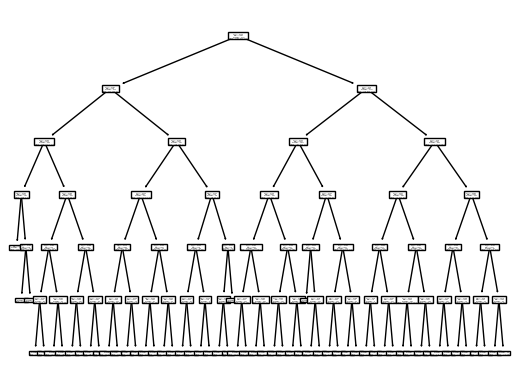

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


clf = DecisionTreeClassifier(max_depth=6, random_state=42)

atributos_sexless = [
    "Length", "Diameter", "Height", "Whole weight",
    "Shucked weight", "Viscera weight", "Shell weight"
    ]
X_train_sexless = X_train[atributos_sexless]
X_test_sexless = X_test[atributos_sexless]

clf.fit(X_train_sexless, y_train)

plot_tree(clf)



TRAIN


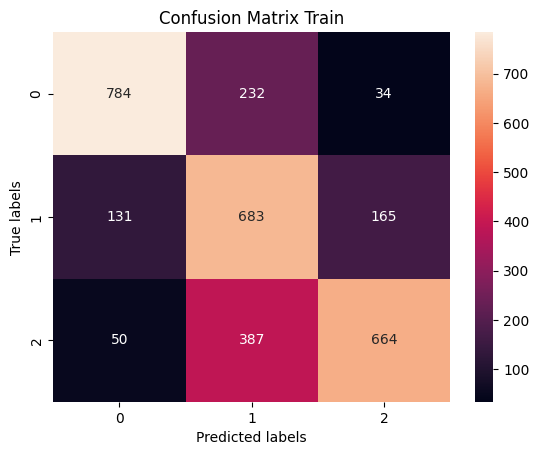

In [73]:
from sklearn.metrics import confusion_matrix

y_train_pred_sexless = clf.predict(X_train_sexless)
y_test_pred_sexless = clf.predict(X_test_sexless)

print("TRAIN")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, y_train_pred_sexless), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Train'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);







TEAST


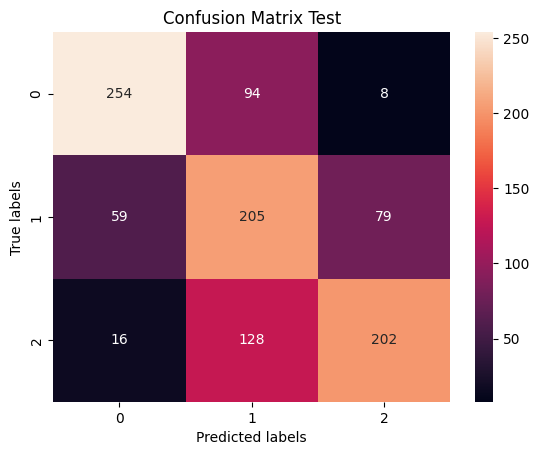

In [74]:
print("\nTEAST")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_test_pred_sexless), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Test'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

In [92]:
(X_train["Diameter"]/X_train["Length"]).describe()

count    3130.000000
mean        0.775626
std         0.032993
min         0.428571
25%         0.756757
50%         0.776699
75%         0.795276
max         0.962963
dtype: float64